# Práctica 1: Aprendizaje automático

__Fecha de entrega: 9 de marzo de 2022__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

__Número de grupo: ???__

__Nombres de los estudiantes: Rubén Gómez, Adrián Pérez y Adrián Sanjuán__

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `prestamos.csv` que se proporciona junto con la práctica. 

El conjunto de datos contiene por cada fila los datos de un préstamo que fue concedido por una empresa de crédito p2p. Las variables que caracterizan el préstamo son las siguientes:
  - `loan_amnt` es la cantidad de dinero solicitada en dólares
  - `purpose` es el propósito para el que se solicitó el préstamo
  - `revenue` son los ingresos anuales en dólares de la persona que solicitó el préstamos
  - `dti_n` es el porcentaje de endeudamiento sobre los ingresos anuales de la persona que solicitó el préstamo
  - `fico_n` se trata de un indicador de solvencia de la persona que solicitó el préstamo. A mayor puntuación, mayor solvencia, y además se cuenta con estos rangos orientativoss:
    - 300-550: Pobre
    - 550-620: Subprime (alto riesgo)
    - 620-680: Crédito aceptable
    - 680-740: Buen crédito
    - 740-850: Excelente crédito

  -`home_ownership_n` es una variable categórica que indica la situación de vivienda en la que vive la persona solicitante
    - `OWN` es en propiedad
    - `MORTAGAGE` indica que está hipotecada
    - `RENT` indica que vive en alquiler
    - `OTHER` es una categoría que agrega otras posibilidades

- `emp_length` es una variable ordinal, no es estrictamente numérica, ya que el valor 0 denota que no consta información, los valores entre 1 y 10 indican una permanencia inferior a X años, y el valor 11 indica una permanencia superior a 10 años.
- `Default` es la variable que usaremos como **variable objetivo** del conjunto de datos e indica si la persona incumplió (incurrió en *default*) o no el préstamo.


Como pandas no tiene forma de saber que las variables `home_ownership_n`, `emp_length` y `Default` son en realidad categóricas, debes indicárselo tú.

In [1]:
import numpy as np
import pandas as pd

In [2]:
#df = pd.DataFrame({'home_ownership_n': ['OWN', 'MORTAGE', 'RENT', 'OTHER']}, dtype = "category")
df = pd.read_csv("prestamos.csv")
df

,loan_amnt,purpose,revenue,dti_n,fico_n,home_ownership_n,emp_length_n,Default
0,32000,car,135000.0,18.93,687.0,MORTGAGE,1,0
1,32000,car,90000.0,9.29,822.0,MORTGAGE,10,1
2,30000,car,95000.0,1.34,722.0,RENT,11,0
3,25750,car,230000.0,6.42,747.0,MORTGAGE,11,0
4,25200,car,72000.0,30.95,692.0,OWN,11,0
...,...,...,...,...,...,...,...,...
13789,1275,vacation,42000.0,31.89,792.0,RENT,0,0
13790,1200,vacation,36000.0,12.27,747.0,MORTGAGE,8,0
13791,1000,vacation,76000.0,25.26,702.0,MORTGAGE,11,0
13792,1000,vacation,32000.0,17.70,747.0,MORTGAGE,0,0


In [3]:
df.dtypes

loan_amnt             int64
purpose              object
revenue             float64
dti_n               float64
fico_n              float64
home_ownership_n     object
emp_length_n          int64
Default               int64
dtype: object

## 2) Análisis de los datos

### 2.1) Numéricos

Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [4]:
df.describe(include="all")

,loan_amnt,purpose,revenue,dti_n,fico_n,home_ownership_n,emp_length_n,Default
count,13794.000000,13794,1.379400e+04,13794.000000,13794.000000,13794,13794.000000,13794.000000
unique,NaN,12,NaN,NaN,NaN,4,NaN,NaN
top,NaN,debt_consolidation,NaN,NaN,NaN,MORTGAGE,NaN,NaN
freq,NaN,7841,NaN,NaN,NaN,6850,NaN,NaN
mean,14507.833116,NaN,7.973730e+04,18.825106,699.106822,NaN,6.488473,0.218138
std,9037.938271,NaN,5.646358e+04,9.795986,32.825754,NaN,3.991551,0.412997
min,1000.000000,NaN,7.000000e+03,0.000000,662.000000,NaN,0.000000,0.000000
25%,7300.000000,NaN,4.800000e+04,12.200000,672.000000,NaN,3.000000,0.000000
50%,12000.000000,NaN,6.800000e+04,18.085000,692.000000,NaN,6.000000,0.000000
75%,20000.000000,NaN,9.700000e+04,24.757500,717.000000,NaN,11.000000,0.000000


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,13794.0,14507.833116,9037.938271,1000.0,7300.0,12000.000,20000.0000,40000.00
revenue,13794.0,79737.299507,56463.579892,7000.0,48000.0,68000.000,97000.0000,1650000.00
dti_n,13794.0,18.825106,9.795986,0.0,12.2,18.085,24.7575,190.87
fico_n,13794.0,699.106822,32.825754,662.0,672.0,692.000,717.0000,847.50
emp_length_n,13794.0,6.488473,3.991551,0.0,3.0,6.000,11.0000,11.00
Default,13794.0,0.218138,0.412997,0.0,0.0,0.000,0.0000,1.00


En la descripción de los datos podemos observar que lo más común en nuestro dataset es que los clientes hayan pedido el préstamos para consolidar su deuda, y por otro lado, que tengan su vivienda hipotecada.

Los mínimos y máximos nos indican en que rangos trabaja cada variable. Por ejemplo los valores de loan_amnt se encuentran en el rango 1000-40000 mientras que los valores de revenue se encuentran entre 7000-165000. Es importante anotar que incluso las variables que en teoría (no lo sabemos) tienen la misma magnitud y unidad, como es el caso de las mencionadas que trabajan en dolares americanos, tienen rangos de valores muy distintos. Todo ello nos indica que para poder hacer un modelo predictivo correcto que le de la misma imortancia a todas las variables, deberemos reescalar los datos.

La desviación típica es grande en relación a la media para las variables loan_amnt y revenue, esto nos indica que los valores de de estas variables están distribuidos y alejados de la media, es edcir, son poco compactos.

Habrá que poner algo más de desviaciones típicas, medias maxios y minimos.

In [6]:
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)

df.corr().style.background_gradient(cmap=cm)

,loan_amnt,revenue,dti_n,fico_n,emp_length_n,Default
loan_amnt,1.000000,0.424460,0.034134,0.090869,0.092295,0.067818
revenue,0.424460,1.000000,-0.137616,0.091204,0.108419,-0.045889
dti_n,0.034134,-0.137616,1.000000,-0.057580,-0.011458,0.121237
fico_n,0.090869,0.091204,-0.057580,1.000000,0.014239,-0.142277
emp_length_n,0.092295,0.108419,-0.011458,0.014239,1.000000,-0.032845
Default,0.067818,-0.045889,0.121237,-0.142277,-0.032845,1.000000


Se puede observar que en general las variables no están correlocionadas entre sí, por tanto no podemos reducir la dimensionalidad prescindiendo de variables. En este sentido es importante destacar que ninguna variable de nuestros datos esta especialmente relacionada con nuestra variable objetivo (default).

Las variables más correlacionadas son revenue y loan_amnt con 0.42 (mientras que el resto no sobrepasan el 0.15 en valor absoluto). Esto se puede deber a que cuanto mayor son los ingresos de un individuo (revenue) más capacidad tiene este para devolver el préstamo y por tanto puede pedir y ser concedido mayores sumas (loan_amnt).

array([[<AxesSubplot:xlabel='loan_amnt', ylabel='loan_amnt'>,
        <AxesSubplot:xlabel='revenue', ylabel='loan_amnt'>,
        <AxesSubplot:xlabel='dti_n', ylabel='loan_amnt'>,
        <AxesSubplot:xlabel='fico_n', ylabel='loan_amnt'>,
        <AxesSubplot:xlabel='emp_length_n', ylabel='loan_amnt'>,
        <AxesSubplot:xlabel='Default', ylabel='loan_amnt'>],
       [<AxesSubplot:xlabel='loan_amnt', ylabel='revenue'>,
        <AxesSubplot:xlabel='revenue', ylabel='revenue'>,
        <AxesSubplot:xlabel='dti_n', ylabel='revenue'>,
        <AxesSubplot:xlabel='fico_n', ylabel='revenue'>,
        <AxesSubplot:xlabel='emp_length_n', ylabel='revenue'>,
        <AxesSubplot:xlabel='Default', ylabel='revenue'>],
       [<AxesSubplot:xlabel='loan_amnt', ylabel='dti_n'>,
        <AxesSubplot:xlabel='revenue', ylabel='dti_n'>,
        <AxesSubplot:xlabel='dti_n', ylabel='dti_n'>,
        <AxesSubplot:xlabel='fico_n', ylabel='dti_n'>,
        <AxesSubplot:xlabel='emp_length_n', ylabel='dti_n'>

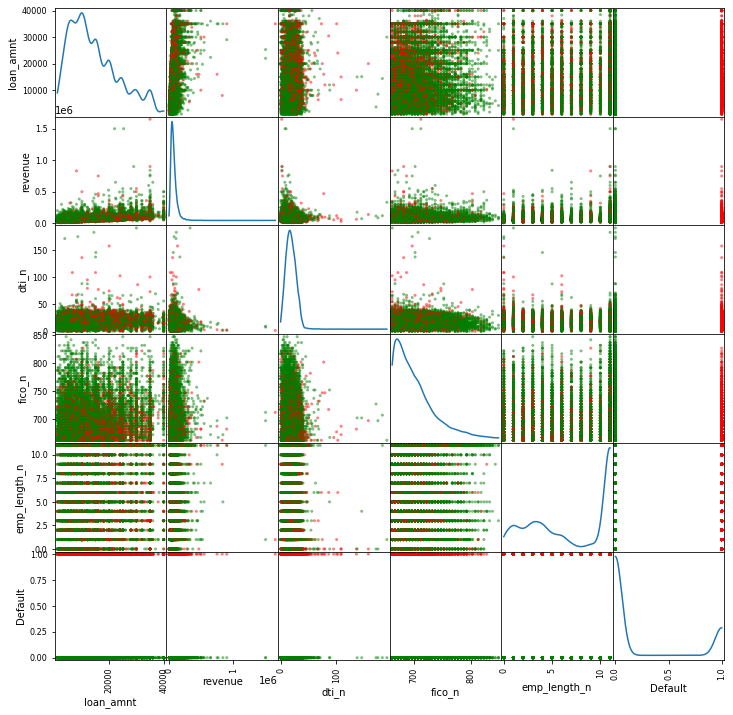

In [7]:
from pandas.plotting import scatter_matrix
%matplotlib inline

dic_colors = { 0: 'green', 1: 'red'}
colors = df['Default'].map(dic_colors)

scatter_matrix(df, figsize = (12, 12), diagonal = 'density', color=colors)

Hemos decidido representar los clientes que no devuelven los préstamos como puntos rojos y los que sí lo hacen con puntos verdes para que sea más intuitiva la forma de interpretar las gráficas de dispersión.

En la diagonal de la matriz observamos gráficos de densidad para cada variable, de las cuales podemos obtener las siguientes conclusiones:

  - `loan_amnt` Tiene una distrubución que decrece aunque tiene picos, sin embargo la mayor parte de los datos están concentrados en la primera mitad del rango de valores que toma la variable.
  - `revenue` Se observa que los valores tienen una distribución que se asemeja a una normal cerca de un punto cercano al extremo inferior del rango.
  - `dti_n` De la misma manera que en revenue los datos se distribuyen normalmente entorno a algún valor que no se aleja demasiado del mínimo.
  - `fico_n` El gráfico de densidad de la variable fico_n se concentra en la parte izquierda, indicandonos que la mayoría de clientes del dataset tienen un índice de solvencia bajo (o que hay pocos con un índice de solvencia alto).
  - `emp_length_n` La mayoría de clientes tienen una permanencia superior a los 10 años. Sin embargo también hay un gran número de ellos que tienen una permanencia de entre 1 y 5 años. "El término medio" (5-10 años de permenencia) parece el menos frecuente.
  - `Default` En cuanto al gráfico de densidad de nuestra variable objetivo podemos observar que hay más casos de clientes que han devuelto el préstamo (valor 0) que de clientes que no lo han hecho (valor 1). Esto puede llegar a sesgar de alguna manera nuestro modelo predictivo.
    

Ninguna combinación de dos variables da como resultado una gráfica de dispersión en la que se observe claramente una diferenciación entre los clientes que devuelven el préstamo y los que no. 

En la gráfica (1era fila y 4ta columna) podemos observar que los puntos rojos se concentran en la parte superior izquierda, que son casos en los que la cantidad prestada es alta y los clientes tienen un indicador de solvenicia bajo. Esta tendencia tiene sentido si tenemos en cuenta que un ínidce de solvencia bajo debería indicar una menor probabilidad de devolución del préstamo, sobre todo si estos son elevados.

En la gráfica (1era fila y 2da columna) observamos una tendencia similar a la anterior en los casos en los que la cantidad prestada es alta también y los ingresos de los cliente que solicitan el préstamo son bajos. Igual que en el caso anterior una cantidad de ingresos baja implica una mayor dificultad a la hora de devolver préstamos especialmente elevados.

Aunque estas dos tendencias tengan sentido, observando la gráfica se ve que no son del todo claras y precisas a la hora de distinguir entre los clientes que devuelven el préstamo y los que no.


### 2.2) Categóricos

Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.

In [8]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

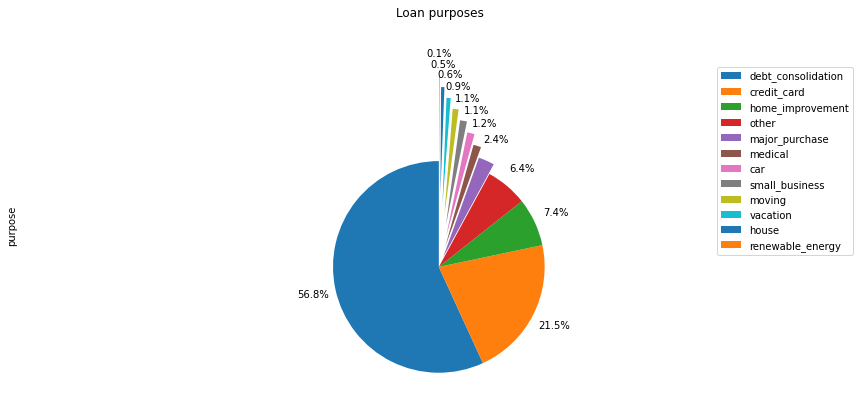

In [9]:
explode_list = [0,0,0,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
purpose = df['purpose'].value_counts()
purpose.plot.pie(autopct='%1.1f%%',
                 figsize=(15, 6),
                 startangle=90,      
                 labels=None,         
                 pctdistance=1.22,    
                 explode=explode_list) #Esto es un diagrama de frecuancias?????
plt.title('Loan purposes', y=1.12) 
plt.axis('equal') 

plt.legend(labels=purpose.index, loc='upper right') 


En este gráfico podemos observar la proporción de clientes que ha solicitado un préstamo para cada propósito. De él podemos sacar las siguientes conclusiones:

- Más de la mitad de los clientes solicitan el préstamos para consolidar deudas
- Hay un gran número de ellos cuyo préstamo está relacionado con la tarjeta de crédito
- En menor medida que los anteriores pero también con una frecuencia representativa hay muchos clientes que piden préstamos para mejoras en sus viviendas
- El resto de propósitos (9 distintos según los datos observados al principio, e incluyendo la categoría 'otros') suponen menos de un cuarto del total de casos.

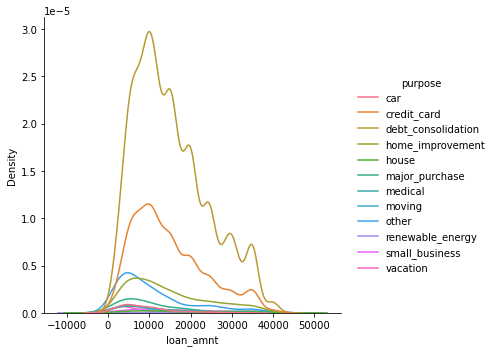

In [10]:
sns.displot(df, x="loan_amnt", hue="purpose", kind='kde')

Se puede observar que para todos los propósitos se cumple que los préstamos más frecuentes son de un valor entorno a 5000-10000 dólares.

In [11]:
df.groupby('purpose').describe().transpose()

purpose                       car    credit_card  debt_consolidation  \
loan_amnt    count     154.000000    2960.000000        7.841000e+03   
             mean     8940.909091   14750.582770        1.533197e+04   
             std      6440.856377    8719.990873        8.865044e+03   
             min      1400.000000    1000.000000        1.000000e+03   
             25%      4356.250000    8000.000000        8.275000e+03   
             50%      7000.000000   12000.000000        1.400000e+04   
             75%     11200.000000   20000.000000        2.000000e+04   
             max     32000.000000   40000.000000        4.000000e+04   
revenue      count     154.000000    2960.000000        7.841000e+03   
             mean    64769.422078   80666.875838        7.809945e+04   
             std     38039.748779   53467.772267        5.634788e+04   
             min     11000.000000    7000.000000        8.400000e+03   
             25%     40000.000000   48000.000000        4.800000e+04   
             50%     55000.000000   68000.000000        6.800000e+04   
             75%     81500.000000  100000.000000        9.500000e+04   
             max    230000.000000  750001.000000        1.650000e+06   
dti_n        count     154.000000    2960.000000        7.841000e+03   
             mean       15.715065      19.016230        1.954185e+01   
             std         8.718852       9.639854        9.394868e+00   
             min         0.350000       0.700000        0.000000e+00   
             25%         8.515000      12.337500        1.300000e+01   
             50%        15.680000      18.120000        1.891000e+01   
             75%        22.605000      24.792500        2.530000e+01   
             max        38.660000     182.810000        1.748600e+02   
fico_n       count     154.000000    2960.000000        7.841000e+03   
             mean      706.191558     698.567568        6.971742e+02   
             std        40.577095      31.380464        3.111796e+01   
             min       662.000000     662.000000        6.620000e+02   
             25%       677.000000     672.000000        6.720000e+02   
             50%       697.000000     692.000000        6.870000e+02   
             75%       727.000000     712.000000        7.120000e+02   
             max       847.500000     827.000000        8.475000e+02   
emp_length_n count     154.000000    2960.000000        7.841000e+03   
             mean        6.006494       6.219257        6.586022e+00   
             std         4.313676       3.963448        3.997228e+00   
             min         0.000000       0.000000        0.000000e+00   
             25%         2.000000       3.000000        3.000000e+00   
             50%         6.000000       6.000000        7.000000e+00   
             75%        11.000000      11.000000        1.100000e+01   
             max        11.000000      11.000000        1.100000e+01   
Default      count     154.000000    2960.000000        7.841000e+03   
             mean        0.188312       0.181757        2.369596e-01   
             std         0.392236       0.385709        4.252444e-01   
             min         0.000000       0.000000        0.000000e+00   
             25%         0.000000       0.000000        0.000000e+00   
             50%         0.000000       0.000000        0.000000e+00   
             75%         0.000000       0.000000        0.000000e+00   
             max         1.000000       1.000000        1.000000e+00   

purpose             home_improvement          house  major_purchase  \
loan_amnt    count       1016.000000      70.000000      337.000000   
             mean       14352.436024   15540.714286    11265.504451   
             std         9623.463775   10231.562749     9357.827863   
             min         1000.000000    2500.000000     1000.000000   
             25%         6400.000000    7037.500000     5000.000000   
             50%        12000.000000   12000.

Es difícil observar diferencias claras entre los diferentes grupos de cliente según el propósito de su préstamo, por lo que prestaremos especial atención a los grupos que hemos observado que eran más representativos en el gráfico anterior:

   - Los clientes cuyo préstamo es solicitado para la consolidación de deuda suelen tener el porcentaje de endeudamiento sobre los ingresos anuales más alto en media (19.5%) de todos los grupos. Por otro lado tienen el índice de solvencia en media más bajo (697.2) de todos los grupos, y también son el grupo más compacto teniendo en cuenta esta variable ya que tienen la desviación estándar más baja (31.1).
     
   - Aquellos cuyo préstamo esta relacionado con la tarjeta de crédito tienen en media, para cada uno de las variables, valores muy parecidos a los del grupo anterior pero en general son valores intermedios teniendo en cuenta la media de cada grupo.
     
   - Las solicitudes de préstamos para mejoras en la casa estan hechas por el grupo de clientes con más permanencia en media (6.9) y con los ingresos más altos en media (96373.2). 

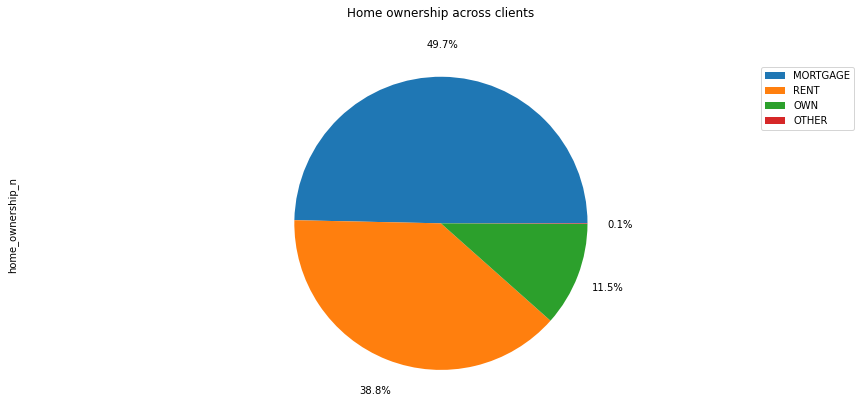

In [12]:
ownership = df['home_ownership_n'].value_counts()

ownership.plot.pie(autopct='%1.1f%%',
                 figsize=(15, 6),
                 startangle=0,      
                 labels=None,         
                 pctdistance=1.22) #Esto es un diagrama de frecuancias?????
plt.title('Home ownership across clients', y=1.12) 
plt.axis('equal') 

plt.legend(labels=ownership.index, loc='upper right') 

En este gráfico podemos observar la proporción de clientes que son dueños de su casa, tienen su vivienda hipotecada o la tienen alquilada. 

Observamos que aproximadamente la mitad de ellos tienen su casa hipotecada. El grupo que vive de alquiler también es grande, mientras que el de aquellos que son dueños es pequeño en comparación con los otros dos grupos.

Es importante ver que los casos de aquellos que no se pueden categorizar en ninguna de las clases anteriores son muy excepcionales en el dataset (la frecuencia en la que aparecen es mínima en comparación con el tamaño de los datos).

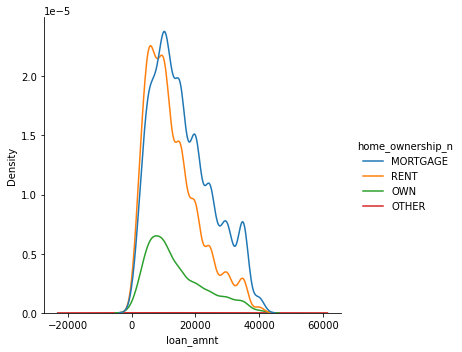

In [13]:
sns.displot(df, x="loan_amnt", hue="home_ownership_n", kind='kde')

Se observa claramente que la mayoría de los casos tienen la vivienda arendada o hipotecada, además podemos destacar que apenas tenemos casos 'OTHER' y que las otras tres categorías alcanzan su pico de frecencia entorno a los $ 10000.

In [14]:
df.groupby('home_ownership_n').describe().transpose()

home_ownership_n        MORTGAGE          OTHER           OWN           RENT
loan_amnt    count  6.850000e+03       9.000000  1.586000e+03    5349.000000
             mean   1.599112e+04   19372.222222  1.380389e+04   12808.852122
             std    9.338103e+03   13647.369506  8.938054e+03    8315.648697
             min    1.000000e+03    3200.000000  1.000000e+03    1000.000000
             25%    8.781250e+03    6500.000000  7.000000e+03    6000.000000
             50%    1.500000e+04   16800.000000  1.120000e+04   10425.000000
             75%    2.200000e+04   32000.000000  2.000000e+04   17500.000000
             max    4.000000e+04   35000.000000  4.000000e+04   40000.000000
revenue      count  6.850000e+03       9.000000  1.586000e+03    5349.000000
             mean   9.049088e+04  108333.333333  7.453239e+04   67461.280596
             std    6.214368e+04   65272.505697  6.498135e+04   41360.598677
             min    1.200000e+04   43000.000000  7.000000e+03    8400.000000
             25%    5.600000e+04   63000.000000  4.200000e+04   40500.000000
             50%    7.800000e+04  105000.000000  6.300000e+04   58000.000000
             75%    1.060000e+05  130000.000000  9.000000e+04   81250.000000
             max    1.650000e+06  250000.000000  1.500000e+06  600000.000000
dti_n        count  6.850000e+03       9.000000  1.586000e+03    5349.000000
             mean   1.918266e+01      17.008889  1.901542e+01      18.313842
             std    1.015568e+01       8.843488  1.012735e+01       9.189828
             min    0.000000e+00       5.430000  0.000000e+00       0.000000
             25%    1.256000e+01      11.230000  1.185250e+01      11.820000
             50%    1.834000e+01      14.510000  1.824000e+01      17.730000
             75%    2.496000e+01      23.330000  2.521750e+01      24.180000
             max    1.908700e+02      33.540000  1.087100e+02     174.860000
fico_n       count  6.850000e+03       9.000000  1.586000e+03    5349.000000
             mean   7.015285e+02     700.888889  7.018430e+02     695.191251
             std    3.409623e+01      30.080909  3.443461e+01      30.205372
             min    6.620000e+02     662.000000  6.620000e+02     662.000000
             25%    6.770000e+02     677.000000  6.770000e+02     672.000000
             50%    6.920000e+02     702.000000  6.920000e+02     687.000000
             75%    7.170000e+02     707.000000  7.170000e+02     712.000000
             max    8.475000e+02     767.000000  8.475000e+02     832.000000
emp_length_n count  6.850000e+03       9.000000  1.586000e+03    5349.000000
             mean   7.077664e+00       5.444444  6.336696e+00       5.780707
             std    3.964337e+00       2.242271  4.179128e+00       3.850511
             min    0.000000e+00       1.000000  0.000000e+00       0.000000
             25%    3.000000e+00       4.000000  3.000000e+00       2.000000
             50%    8.000000e+00       6.000000  6.000000e+00       5.000000
             75%    1.100000e+01       7.000000  1.100000e+01      10.000000
             max    1.100000e+01       8.000000  1.100000e+01      11.000000
Default      count  6.850000e+03       9.000000  1.586000e+03    5349.000000
             mean   1.859854e-01       0.222222  2.225725e-01       0.257992
             std    3.891233e-01       0.440959  4.161047e-01       0.437571
             min    0.000000e+00       0.000000  0.000000e+00       0.000000
             25%    0.000000e+00       0.000000  0.000000e+00       0.000000
             50%    0.000000e+00       0.000000  0.000000e+00       0.000000
             75%    0.000000e+00       0.000000  0.000000e+00       1.000000
             max    1.000000e+00       1.000000  1.000000e+00       1.000000

En la tabla anterior agrupamos los clientes según son dueños de su casa, tienen su vivienda hipotecada o la tienen alquilada (u otros).

Entre los tres grupos principales se pueden observar diferencias claras en las siguientes variables:

   - La permanencia de los clientes hipotecados es en media (7 años) bastante mayor que la de los dueños de casas (6.3 años) y los clientes que viven de alquiler (5.8 años)
    
   - Dos variables que ya hemos indicado que tiene sentido que vayan de la mano son la cantidad prestada y los ingresos del cliente, ambas son mayores en media para los clientes hipotecados, seguidos de los clientes dueños, siendo los que viven de alquiler los que tienen los valores más bajos.
    
   - El índice de solvencia bastante parecido tanto en media (en torno a los 700) como en el rango de valores para los tres grupos de clientes.

## 3) Preprocesar los datos

Para el clustering vamos a trabajar solamente con las variables verdaderamente numéricas. Crea un nuevo dataframe que sólo contenga las variables `loan_amnt`, `revenue`, `dti_n` y `fico_n`.

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de préstamos similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

In [15]:
df_n = df[["loan_amnt", "revenue" , "dti_n", "fico_n", "Default"]]
features = df_n.columns[:-1]
df_features = df[features]

Como hemos podido observar al comienzo del análisis, cada variable de nuestros datos trabaja con magnitudes y rangos diferentes por lo que hace falta una normalización de las variables para que nuestro modelo tenga en cuenta a todas ellas por igual.


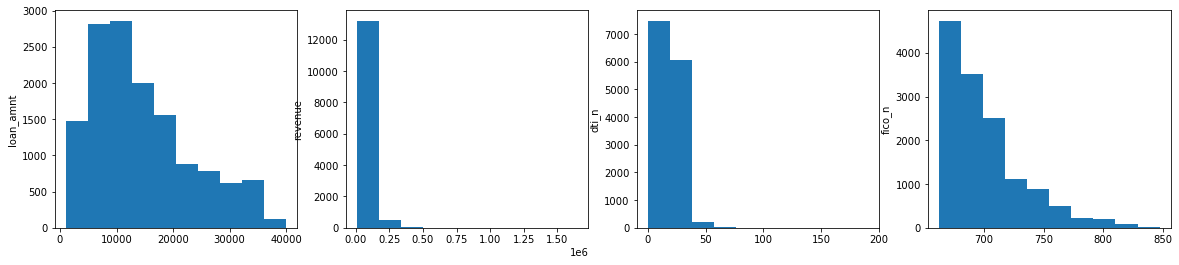

In [16]:
fig = plt.figure(figsize = (20, 4))
for i in range(len(df_features.columns)):
    p = fig.add_subplot(1, 4, i+1)
    df_n[df_n.columns[i]].plot.hist(ax=p)
    p.set_ylabel(df_n.columns[i])

Observando las distribuciones de las variables a normalizar, hemos decidido estandarizarlas ya que la mayoría concentran gran parte de sus valores cerca del mínimo y asemejan su forma a la de una normal con media en un valor cercano al mínimo.

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df_features)
df_n_km = pd.DataFrame(data = scaled, columns = features)
df_n_km

,loan_amnt,revenue,dti_n,fico_n
0,1.935486,0.978767,0.010708,-0.368834
1,1.935486,0.181764,-0.973404,3.743939
2,1.714188,0.270320,-1.784990,0.697440
3,1.243931,2.661329,-1.266392,1.459065
4,1.183075,-0.137037,1.237786,-0.216509
...,...,...,...,...
13789,-1.464196,-0.668372,1.333747,2.829990
13790,-1.472495,-0.774639,-0.669187,1.459065
13791,-1.494624,-0.066192,0.656915,0.088141
13792,-1.494624,-0.845484,-0.114858,1.459065


## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo, el índice davies_boulding y el coeficiente silhouette en función del número de clusters.

In [19]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [20]:
K_MAX = 11
RANDOM_STATE= 333
davies_boulding = np.zeros(K_MAX-2)
score = np.zeros(K_MAX-2)
silhouette = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=RANDOM_STATE)
    km.fit(df_n_km)
    
    silhouette[k-2] = silhouette_score(df_n_km, km.labels_)
    score[k-2] = -1*km.score(df_n_km)
    davies_boulding[k-2] = davies_bouldin_score(df_n_km, km.labels_) 


Text(0.5, 1.0, 'Diagrama del codo')

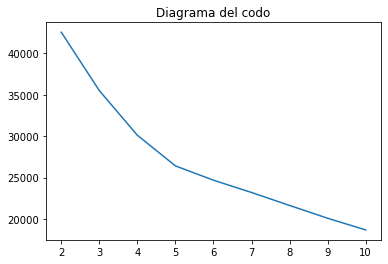

In [21]:
plt.plot(range(2, K_MAX), score)
plt.title('Diagrama del codo')

El diagrama del codo representa como de compactos (valor bajo = más compacto) son los grupos creados para los diferentes valores de k. El objetivo es encontrar un valor de k a partir del cual la variable score reduzca la velocidad a la que decrece para así hacer una buena separación con el número de clusters (k) más bajo posible. En nuestro caso no apreciamos que esto ocurra por lo que tendremos que guiarnos por otras medidas.

Text(0.5, 1.0, 'Valor de Davies Boulding para diferentes k')

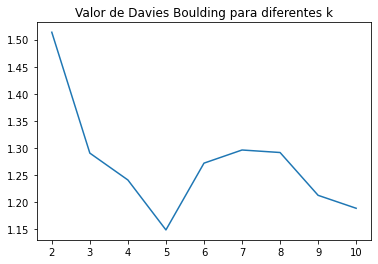

In [22]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

El coeficiente de Davies Boulding es una medida de lo compactos que son los clusters generados y de lo alejados que están entre sí. Al igual que en la primera gráfica, el objetivo es encontrar el menor número de clusters para el cual este coeficiente es suficientemente bajo (clusters más compactos y separados entre sí). Podemos observar que obtenemos un coeficiente mínimos para k = 5 el cual puede ser un buen candidato para hacer nuestros agrupamientos.

Text(0.5, 1.0, 'Valor de Silhouette para diferentes k')

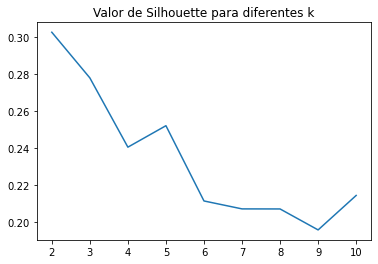

In [23]:
plt.plot(range(2, K_MAX), silhouette)
plt.title('Valor de Silhouette para diferentes k') #Fijarse valores altos

El valor de Silhouette es una medida que indica cómo de parecido es un objeto a su cluster y como de distinto es al resto. Así dará valores altos a objetos muy emparejado con su propio cluster y mal emparejado con los clusters vecinos. Encontramos que el valor de k = 5 es bastante alto en su entorno y confirmamos que puede ser un buen k. Usaremos k = 5 para nuestro k-Means.

In [25]:
K = 5
km = KMeans(init='random', n_clusters=K, random_state=RANDOM_STATE)
km.fit(df_n_km)
df_n = df_n.assign(cluster=pd.Series(data=km.labels_))
df_n

,loan_amnt,revenue,dti_n,fico_n,Default,cluster
0,32000,135000.0,18.93,687.0,0,0
1,32000,90000.0,9.29,822.0,1,4
2,30000,95000.0,1.34,722.0,0,0
3,25750,230000.0,6.42,747.0,0,1
4,25200,72000.0,30.95,692.0,0,0
...,...,...,...,...,...,...
13789,1275,42000.0,31.89,792.0,0,4
13790,1200,36000.0,12.27,747.0,0,4
13791,1000,76000.0,25.26,702.0,0,2
13792,1000,32000.0,17.70,747.0,0,4


## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior. Si te han salido más de 3, elige 3 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y dales un sentido dentro del contexto del problema. ¿Qué perfil de préstamos quedan en cada cluster? Según dicho perfil, ¿qué cluster te parece que tendrá una mayor tasa de "default"? Corrobóralo calculando para cada cluster la proporción de préstamos que acabaron en "default".

Pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar k-Means con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

In [26]:
df_n_final = df_n[["loan_amnt", "revenue" , "dti_n", "fico_n","Default","cluster"]]

In [27]:
pd.set_option("max_rows", None)
df_n_final.groupby("cluster").describe().transpose()

cluster                      0             1              2              3  \
loan_amnt count    2881.000000  3.020000e+02    3637.000000    4996.000000   
          mean    27185.230823  2.634793e+04   11047.724773    9641.338070   
          std      5803.257371  8.879728e+03    5500.152402    4763.490894   
          min     10550.000000  2.500000e+03    1000.000000    1000.000000   
          25%     22800.000000  2.000000e+04    6500.000000    6000.000000   
          50%     26050.000000  2.800000e+04   10000.000000   10000.000000   
          75%     32000.000000  3.500000e+04   15000.000000   12800.000000   
          max     40000.000000  4.000000e+04   37000.000000   25000.000000   
revenue   count    2881.000000  3.020000e+02    3637.000000    4996.000000   
          mean   106677.344877  3.149067e+05   57182.368774   67702.252566   
          std     36320.317421  1.701477e+05   25899.625932   31832.214819   
          min     25000.000000  1.890000e+05    7000.000000    8400.000000   
          25%     80000.000000  2.332500e+05   40000.000000   45000.000000   
          50%    100000.000000  2.600000e+05   52000.000000   61000.000000   
          75%    130000.000000  3.237500e+05   70000.000000   84000.000000   
          max    230000.000000  1.650000e+06  332500.000000  221000.000000   
dti_n     count    2881.000000  3.020000e+02    3637.000000    4996.000000   
          mean       19.019566  1.164467e+01      28.960517      12.999291   
          std         7.516473  7.628159e+00       9.393975       5.025965   
          min         0.220000  1.200000e-01      19.000000       0.000000   
          25%        13.860000  6.577500e+00      24.150000       9.340000   
          50%        18.890000  1.031500e+01      27.360000      13.380000   
          75%        23.930000  1.556750e+01      31.800000      17.130000   
          max        62.700000  7.743000e+01     190.870000      23.530000   
fico_n    count    2881.000000  3.020000e+02    3637.000000    4996.000000   
          mean      696.151336  7.121987e+02     689.673907     683.660328   
          std        23.691448  3.833703e+01      20.770508      17.141889   
          min       662.000000  6.620000e+02     662.000000     662.000000   
          25%       677.000000  6.820000e+02     672.000000     667.000000   
          50%       692.000000  7.070000e+02     687.000000     682.000000   
          75%       712.000000  7.320000e+02     707.000000     697.000000   
          max       792.000000  8.270000e+02     782.000000     727.000000   
Default   count    2881.000000  3.020000e+02    3637.000000    4996.000000   
          mean        0.253731  1.688742e-01       0.295573       0.188551   
          std         0.435221  3.752626e-01       0.456363       0.391191   
          min         0.000000  0.000000e+00       0.000000       0.000000   
          25%         0.000000  0.000000e+00       0.000000       0.000000   
          50%         0.000000  0.000000e+00       0.000000       0.000000   
          75%         1.000000  0.000000e+00       1.000000       0.000000   
          max         1.000000  1.000000e+00       1.000000       1.000000   

cluster                      4  
loan_amnt count    1978.000000  
          mean    12889.092518  
          std      7466.126348  
          min      1000.000000  
          25%      7000.000000  
          50%     12000.000000  
          75%     17000.000000  
          max     40000.000000  
revenue   count    1978.000000  
          mean    76463.266471  
          std     36071.419637  
          min      9036.000000  
          25%     50000.000000  
          50%     70000.000000  
          75%     97000.000000  
          max    225000.000000  
dti_n     count    1978.000000  
          mean       15.716678  
          std         7.737271  
          min         0.000000  
          25%         9.972500  
          50%        15.460000  
          75%        20.720000  
         

Comentaremos los clusters 1, 2 y 4.
   - Cluster 1:  Se trata del cluster menos numeroso con diferencia, consta de 320 instancias mientras que los demás constan de mínimo 1900 instancias. Se distingue del resto por ser el de los préstamos de mayor importe (entre los elegidos), teniendo una media de 26347 dólares, mientras que la media de los clusters 2 y 4  ronda los 12000. Pero sobre todo se distingue porque los valores de revenue son significatiamente mayores al resto, estando entorno a 314000 mientras el resto supera los 107000 (2 y 4 no superan 80000 en media). Así este parece un perfil de préstamos a personas pudientes que, a pesar de que en media tengan una más elevada cuantía, podrán ser devueltos en general.
   - El cluster 2 se distingue del resto por la variable dti. Esta variale toma valores mayores para este cluster, teniendo una media de 29 frente a ~15, que tiene el resto. Esta variable es el porcentaje de endeudamiento sobre los ingresos anuales de la persona que solicitó el préstamo, así que los individuos de este cluster tendrán más dificultades económicas y por tanto serán más propensos a caer en impagos. A esto le unimos que se trata del cluster con menor media en revenue (57182), es decir, individuos poco pudientes.
   - El cluster 4 se distingue del resto sobre todo por la variable fico, en la que toma valores mayores al resto. Mientras que los demás clusters tienen media entre 683 y 713, éste tiene 758. Además alrededor del 75% de los datos fuera de este cluster son menores a 732, cercano al mínimo de los valores que toma esta variable dentro de este cluster (717). Dado que los individuos de este cluster se identifican por mayor fico y esta variable indica su solvencia se entiende que tenderán a devolver sus préstamos en mayor medida que el resto.
  
La variable Default es una variable booleana que indica si el cliente ha devuelto (0) o no ha devuelto el préstamo (1). Como adquiere los valores 0 y 1, la media será la proporción de aquellos que no han devuelto el préstamo.

Como vemos en la media de la variable Default para cada uno de los clusters nuestros razonamientos estaban en lo cierto. El cluster 1 tiene un porcentaje de morosidad de 17%, menor que el 2 (30%), que es el mayor de todos, y mayor que el 4 (11%), que es en el que más se devuelven los préstamos.

array([[<AxesSubplot:xlabel='loan_amnt', ylabel='loan_amnt'>,
        <AxesSubplot:xlabel='revenue', ylabel='loan_amnt'>,
        <AxesSubplot:xlabel='dti_n', ylabel='loan_amnt'>,
        <AxesSubplot:xlabel='fico_n', ylabel='loan_amnt'>,
        <AxesSubplot:xlabel='Default', ylabel='loan_amnt'>,
        <AxesSubplot:xlabel='cluster', ylabel='loan_amnt'>],
       [<AxesSubplot:xlabel='loan_amnt', ylabel='revenue'>,
        <AxesSubplot:xlabel='revenue', ylabel='revenue'>,
        <AxesSubplot:xlabel='dti_n', ylabel='revenue'>,
        <AxesSubplot:xlabel='fico_n', ylabel='revenue'>,
        <AxesSubplot:xlabel='Default', ylabel='revenue'>,
        <AxesSubplot:xlabel='cluster', ylabel='revenue'>],
       [<AxesSubplot:xlabel='loan_amnt', ylabel='dti_n'>,
        <AxesSubplot:xlabel='revenue', ylabel='dti_n'>,
        <AxesSubplot:xlabel='dti_n', ylabel='dti_n'>,
        <AxesSubplot:xlabel='fico_n', ylabel='dti_n'>,
        <AxesSubplot:xlabel='Default', ylabel='dti_n'>,
        <Axes

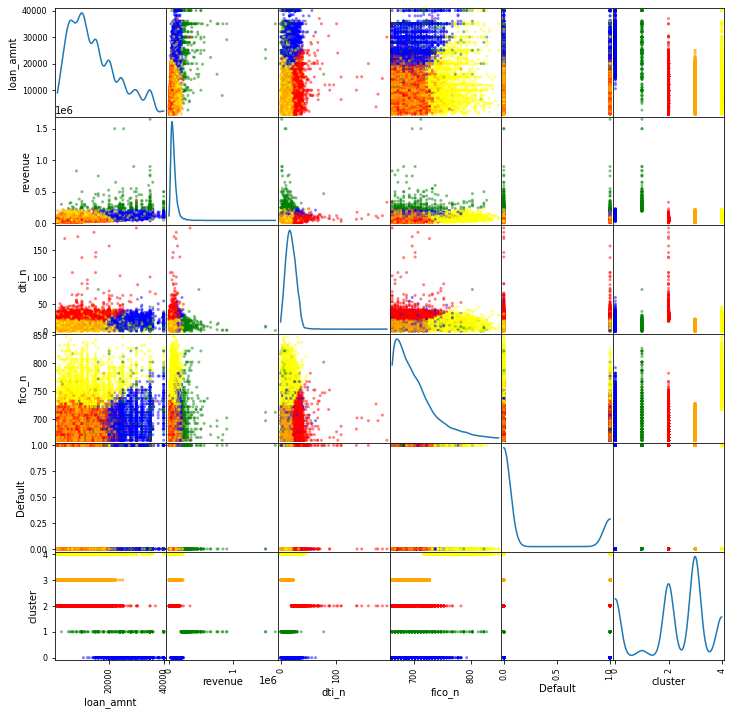

In [28]:
%matplotlib inline


dic_colors = { 0: 'blue', 1: 'green', 2: 'red',3: 'orange', 4: 'yellow'}
colors = df_n_final['cluster'].map(dic_colors)

scatter_matrix(df_n_final, figsize = (12, 12), diagonal = 'density', color=colors)

En las gráficas podemos confirmar nuestras proposiciones anteriores sobre lo que distingue a cada cluster. Aquí se puede ver que hay variables o pares de ellas que solo logran distinguir claramente uno o dos de los clusters mientras el resto quedan totalmente mezclados. 

Así, el cluster 0 (azul) parece distinguirse bien de la mayoría mediante el uso simultáneo de la variable loan_amnt con cualquiera de las otras tres variables. 

El cluster 1 (verde), está en general mezclado con el resto pero con la variable revenue se distingue bastante bien, pues son los puntos que toman mayores valores. 

El cluster 2 (rojo) se distingue bastante bien con la variable dti pero conviene usar tambien la variable loan_amnt para discriminar los valores del cluster 0 (azul).

Para el cluster 3 (naranja), la variable que mas discrimina es dti aunque conviene usar también la variable fico para discriminar los valores del cluster 4 (amarillo). Además sería conveniente usar la variable loan_amnt para distinguir de los valores del cluster 0 (azul). 

Por último el cluster 4 (amarillo) aparece bastante diferenciado por la variable fico para la que obtiene valores altos, observando una mejor separación cuando se empareja con las variables revenue o con loan_amnt, para las que suele tener valores bajos. 

Comentado esto podemos extraer que los clusters se separan bastante bien teniendo en cuenta las variables adecuadas.